In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [15]:
data = fetch_20newsgroups()

In [16]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

in order to keep this simple, let's select just a few categories and download the training and testing data

In [17]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [18]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



to be able to use this for naive bayes classification we need to first convert this text into representative numerical values using the <b><i>tf-idf vectorizer</i></b> and create a pipeline that attaches it to a multinomial naive bayes

In [19]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [20]:
model.fit(train.data, train.target)
# predict
labels = model.predict(test.data)

now that we have predicted, let's evalute the performance of the estimator

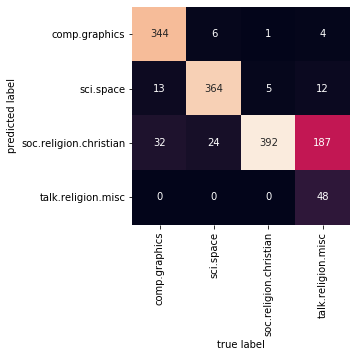

In [23]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

we can see how a simple classifier can successfully seperate space related talk from computer related talk but does get confused between religion and Christianity (perhaps an expected area of confusion for a computer)<p>let's predict for a single string!!!

In [24]:
def predCategory(s, train=train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [25]:
predCategory('sending a payload to ISS')

'sci.space'

In [27]:
predCategory('determining the screen resolution')

'comp.graphics'